In [2]:
## Importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import warnings
warnings.filterwarnings("ignore")

In [49]:
## loading datasets
global_trade_wb_data = pd.read_csv('Data/worldbank_countries.csv')

In [50]:
## Manipulating the data
global_trade_wb_data['Export_in_Trillions'] = global_trade_wb_data['Export'] / 1e12
global_trade_wb_data['Import_in_Trillions'] = global_trade_wb_data['Import'] / 1e12

In [51]:
global_trade_wb_data.columns

Index(['Country Name', 'Country Code', 'Year', 'Agriculture (% GDP)',
       'Ease of Doing Business', 'Education Expenditure (% GDP)',
       'Export (% GDP)', 'GDP', 'Health Expenditure (% GDP)', 'Import (% GDP)',
       'Industry (% GDP)', 'Inflation Rate', 'R&D', 'Service (% GDP)',
       'Unemployment', 'Population', 'Land', 'Continent Name', 'Export',
       'Import', 'Education Expenditure', 'Health Expenditure', 'Net Trade',
       'GDP Per Capita', 'Population Density', 'Export_in_Trillions',
       'Import_in_Trillions'],
      dtype='object')

In [52]:
global_trade_wb_data.head(3)

,Country Name,Country Code,Year,Agriculture (% GDP),Ease of Doing Business,Education Expenditure (% GDP),Export (% GDP),GDP,Health Expenditure (% GDP),Import (% GDP),...,Continent Name,Export,Import,Education Expenditure,Health Expenditure,Net Trade,GDP Per Capita,Population Density,Export_in_Trillions,Import_in_Trillions
0,Afghanistan,AFG,2000,27.501127,40.717968,13.670101,NaN,1.415197e+10,10.902580,NaN,...,Asia,NaN,NaN,1.934589e+09,1.542930e+09,NaN,724.145910,29.934415,NaN,NaN
1,Afghanistan,AFG,2001,27.501127,40.717968,13.670101,NaN,1.415197e+10,10.902580,NaN,...,Asia,NaN,NaN,1.934589e+09,1.542930e+09,NaN,718.788917,30.157510,NaN,NaN
2,Afghanistan,AFG,2002,38.627892,40.717968,13.670101,NaN,3.854235e+09,9.443391,NaN,...,Asia,NaN,NaN,5.268779e+08,3.639705e+08,NaN,183.532775,32.166553,NaN,NaN


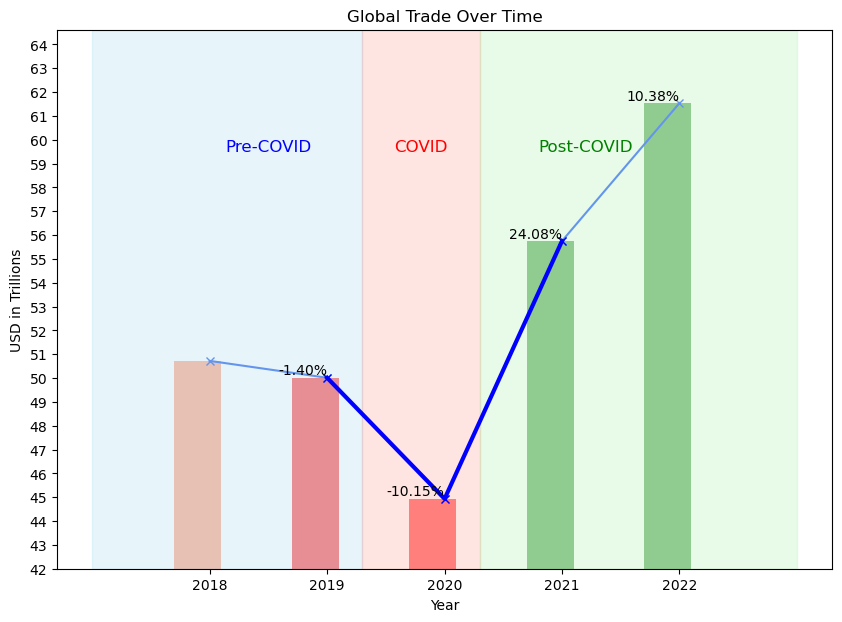

In [17]:
## Overall Net Trade Volumes

# Group data by year and calculate total exports, imports, and GDP
global_trade_wb_data_subset = global_trade_wb_data[global_trade_wb_data['Year']>2017]
trade_summary = global_trade_wb_data_subset.groupby('Year').agg(
    Total_Export=('Export', 'sum'),
    Total_Import=('Import', 'sum'),
).reset_index()

# Converting to trillions
trade_summary['Total_Export_in_Trillions'] = trade_summary['Total_Export'] / 1e12
trade_summary['Total_Import_in_Trillions'] = trade_summary['Total_Import'] / 1e12
trade_summary['Total_Trade_in_Trillions'] = trade_summary['Total_Export_in_Trillions'] + trade_summary['Total_Import_in_Trillions']
trade_summary['Percent_Change'] = trade_summary['Total_Trade_in_Trillions'].pct_change() * 100

## plot-1
plt.figure(figsize=(10, 7))

## line plot
plt.plot(trade_summary['Year'], trade_summary['Total_Trade_in_Trillions'], label='Global Trade Value', marker='x',color='cornflowerblue')
# plt.plot(trade_summary['Year'], trade_summary['Total_Export_in_Trillions'], label='Global Import Value', marker='x')
## bar plot
# plt.bar(trade_summary['Year'] - 0.1, trade_summary['Total_Export_in_Trillions'], width=0.4, label='Export Value (Bar)', alpha=0.5)
# plt.bar(trade_summary['Year'] + 0.2, trade_summary['Total_Import_in_Trillions'], width=0.4, label='Import Value (Bar)', alpha=0.5)

# Determine colors for the bar chart
colors = []
previous_value = trade_summary['Total_Trade_in_Trillions'].iloc[0]  # Initialize with the first value
for value in trade_summary['Total_Trade_in_Trillions']:
    if value > previous_value:
        # Calculate the intensity of green based on the percentage increase
        intensity = min(1, (value - previous_value) / previous_value)
        intensity += intensity/2
#         colors.append((0, 0.6, 0, intensity))  # RGBA for green with varying alpha for intensity
        colors.append('forestgreen')
    elif value < previous_value:
        # Calculate the intensity of red based on the percentage decrease
        intensity = min(1, (previous_value - value) / previous_value)
        intensity -= intensity/2
#         colors.append((1, 0, 0, intensity))  # RGBA for red with varying alpha for intensity
        colors.append('red')
    else:
        colors.append('coral')  # Neutral color for no change
    previous_value = value


# Bar plot with dynamic colors
for i, (year, value) in enumerate(zip(trade_summary['Year'], trade_summary['Total_Trade_in_Trillions'])):
    plt.bar(year - 0.1, value, width=0.4, color=colors[i], label='Trade Value (Bar)', alpha=0.5)

# Annotating each point with the percentage change
for i, (x, y, pct_change) in enumerate(zip(trade_summary['Year'], trade_summary['Total_Trade_in_Trillions'], trade_summary['Percent_Change'])):
    if i > 0:  # Skip the first year since there's no previous year to compare to
        plt.text(x, y, f"{pct_change:.2f}%", ha='right', va='bottom')
        
max_value = trade_summary['Total_Trade_in_Trillions'].max()
min_value = trade_summary['Total_Trade_in_Trillions'].min()
        
# Highlighting different periods with background colors
plt.axvspan(2017, 2019.3, color='skyblue', alpha=0.2, label='Pre-COVID')
plt.axvspan(2019.3, 2020.3, color='salmon', alpha=0.2, label='COVID')
plt.axvspan(2020.3, trade_summary['Year'].max() + 0.999, color='lightgreen', alpha=0.2, label='Post-COVID')  

# Plotting the bold line for 2019 to 2021 period
covid_period = trade_summary[(trade_summary['Year'] >= 2019) & (trade_summary['Year'] <= 2021)]
plt.plot(covid_period['Year'], covid_period['Total_Trade_in_Trillions'], marker='x', color='blue', linewidth=3)


plt.text(2018.5, max_value * 0.97, 'Pre-COVID', ha='center', va='center', fontsize=12, color='blue')
plt.text(2019.8, max_value * 0.97, 'COVID', ha='center', va='center', fontsize=12, color='red')
plt.text(2021.2, max_value * 0.97, 'Post-COVID', ha='center', va='center', fontsize=12, color='green')


plt.title('Global Trade Over Time')
plt.xlabel('Year')
plt.ylabel('USD in Trillions')
plt.xticks(trade_summary["Year"].values)


# Set y-axis to start from a bit lower than min value and go a bit higher than max value to ensure visibility
plt.ylim([min_value * 0.95, max_value * 1.05])
# Customizing y-axis ticks to avoid showing up to 20 unnecessarily
plt.yticks([i for i in range(int(min_value * 0.95), int(max_value * 1.05) + 1) if i >= 22])
# plt.legend()
# plt.grid(True)

plt.show()



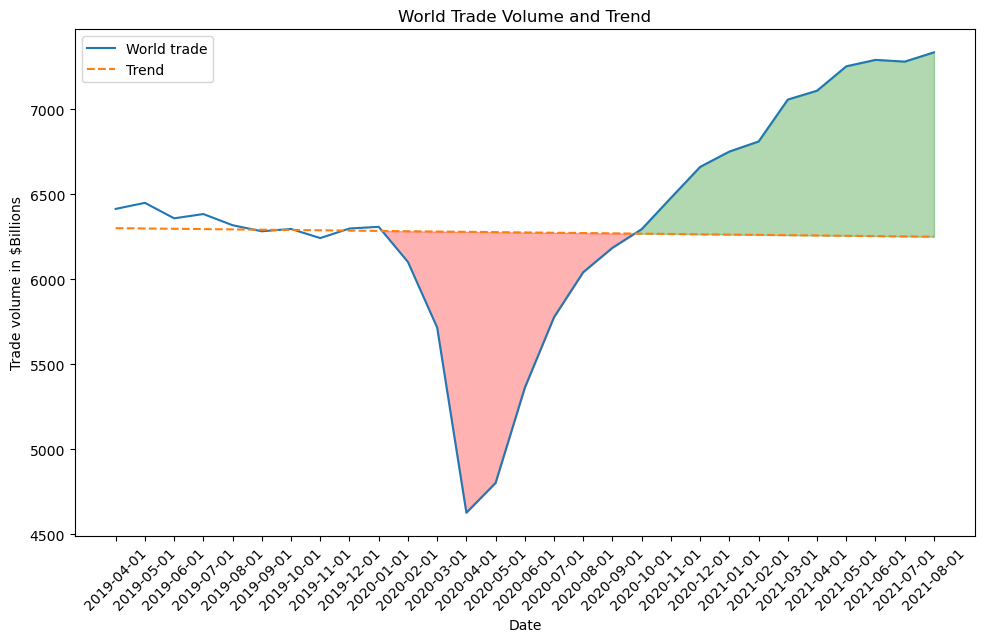

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as mdates

# Create a pandas DataFrame with your time series data
# Replace this with your actual data
# dates = pd.date_range(start='2019-03-01', periods=24, freq='M')
# actual_data = np.random.normal(120, 5, len(dates)) # Replace with your actual world trade data
# trend_data = np.linspace(start=115, stop=125, num=len(dates)) # Replace with your trend data

# df = pd.DataFrame({
#     'Date': dates,
#     'World_Trade': actual_data,
#     'Trend': trend_data
# })

df = pd.read_csv('monthly_timeseries.csv')
# df['Value'] -= df['Value']*0.13
df = df[(df['TIME']<'2021-09-01')&(df['TIME']>'2019-03-01')]
# Now, plot the actual data and the trend
plt.figure(figsize=(10, 6))
plt.plot(df['TIME'], df['Value'], label='World trade')
trend_data = np.linspace(start=6300, stop=6250, num=len(df['TIME']))
plt.plot(df['TIME'], trend_data, label='Trend', linestyle='--')

# Fill the area between the actual data and the trend
# plt.fill_between(df['TIME'], df['Value'], trend_data, color='red', alpha=0.3, where=(df['Value'] < trend_data), label='Cumulative gap (%)')

# Shade the area above the trend
plt.fill_between(df['TIME'], df['Value'], trend_data, where=((df['Value'] >= trend_data)&(df['TIME']>'2020-03-01')), 
                 color='green', alpha=0.3, interpolate=True)

# Shade the area below the trend
plt.fill_between(df['TIME'], df['Value'], trend_data, where=((df['Value'] < trend_data)&(df['TIME']>'2020-01-01')), 
                 color='red', alpha=0.3, interpolate=True)

# Customizing the plot
plt.xlabel('Date')
plt.ylabel('Trade volume in $Billions')
plt.title('World Trade Volume and Trend')
plt.legend()
# plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
# Show the plot
plt.show()


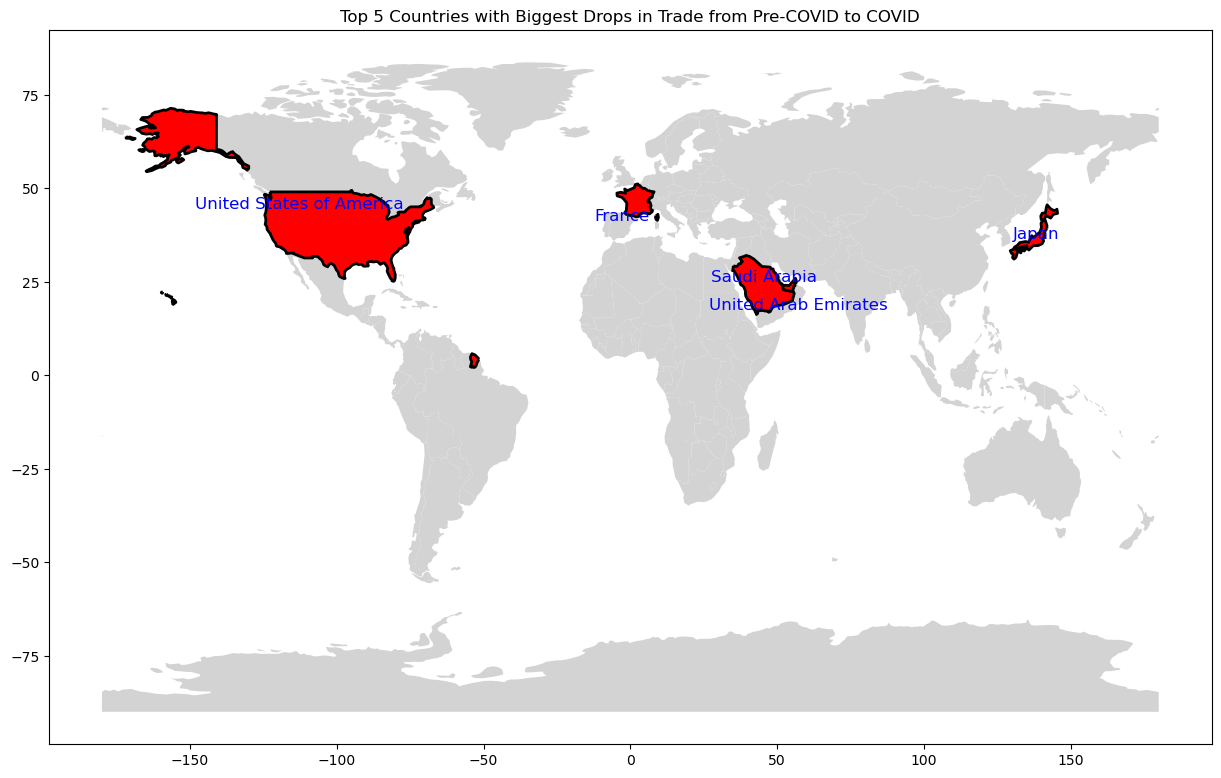

In [45]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import imageio

# Load your dataset
df_worldbank = pd.read_csv('Data/worldbank_countries.csv')
df_worldbank['Total_Trade'] = df_worldbank['Export'] + df_worldbank['Import']
# Prepare the data for different periods
df_pre_covid = df_worldbank[df_worldbank['Year'].isin([2018, 2019])]
df_covid = df_worldbank[df_worldbank['Year'].isin([2020, 2021])]


# Aggregate export data by country and calculate the average for each period
exports_pre_covid = df_pre_covid.groupby('Country Name')['Total_Trade'].mean().reset_index()
exports_covid = df_covid.groupby('Country Name')['Total_Trade'].mean().reset_index()

# Calculate the difference in exports between the periods for each country
exports_change = exports_pre_covid.set_index('Country Name').join(exports_covid.set_index('Country Name'), lsuffix='_pre', rsuffix='_covid', how='inner')
exports_change['Total_Trade_Difference'] = exports_change['Total_Trade_covid'] - exports_change['Total_Trade_pre']

# Sort by the biggest drops in exports
top_impacted_countries = exports_change.sort_values(by='Total_Trade_Difference').head(5).index.tolist()
top_impacted_countries = ['United States of America', 'France', 'Saudi Arabia', 'United Arab Emirates', 'Japan']
# Load a world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

filenames = []



fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightgrey')  # Plot the entire world in light grey

colors = ['red', 'red', 'red', 'red', 'red']  # Colors for the top 3 countries

for country_name, color in zip(top_impacted_countries, colors):
    # Check if country_name exists in the world GeoDataFrame
    if country_name in world['name'].values:
        world[world['name'] == country_name].plot(ax=ax, color=color, legend=True, label=f'{country_name}')

# Customize the plot
ax.set_title('Top 5 Countries with Biggest Drops in Exports from Pre-COVID to COVID')

country_positions = {
    'Saudi Arabia': {'x_offset': 1, 'y_offset': 2},  # Adjust these values as needed
    'United Arab Emirates': {'x_offset': 3, 'y_offset': -5}  # Adjust these values as needed
}

for country_name, color in zip(top_impacted_countries, colors):
    # Check if country_name exists in the world GeoDataFrame
    if country_name in world['name'].values:
        # Highlight the country with a specific color and thicker border
        world[world['name'] == country_name].plot(ax=ax, color=color, edgecolor='black', linewidth=2, legend=True, label=f'{country_name}')
        
        
        # Adding an annotation with the country name
        x, y = world[world['name'] == country_name].geometry.centroid.x.iloc[0], world[world['name'] == country_name].geometry.centroid.y.iloc[0]
        # Adjust position if the country is Saudi Arabia or UAE
        if country_name in country_positions:
            x += country_positions[country_name]['x_offset']
            y += country_positions[country_name]['y_offset']
        ax.text(x, y, country_name, fontsize=12, ha='center', va='center',  color='blue')


# Customize the plot
ax.set_title('Top 5 Countries with Biggest Drops in Trade from Pre-COVID to COVID')


plt.show()

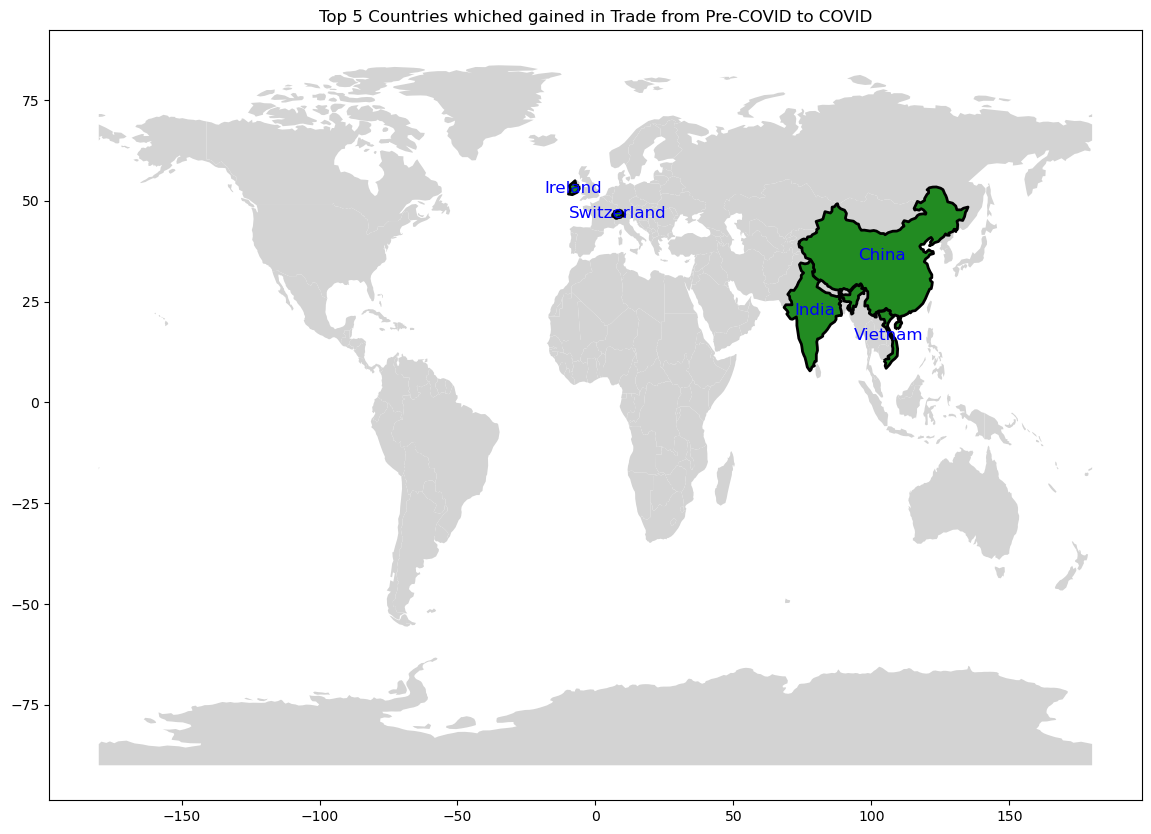

In [47]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import imageio

# Loading the dataset
df_worldbank = pd.read_csv('Data/worldbank_countries.csv')

# Prepare the data for different periods
df_pre_covid = df_worldbank[df_worldbank['Year'].isin([2018, 2019])]
df_covid = df_worldbank[df_worldbank['Year'].isin([2020, 2021])]

# Aggregate export data by country and calculate the average for each period
exports_pre_covid = df_pre_covid.groupby('Country Name')['Export'].mean().reset_index()
exports_covid = df_covid.groupby('Country Name')['Export'].mean().reset_index()

# Calculate the difference in exports between the periods for each country
exports_change = exports_pre_covid.set_index('Country Name').join(exports_covid.set_index('Country Name'), lsuffix='_pre', rsuffix='_covid', how='inner')
exports_change['Export_Difference'] = exports_change['Export_covid'] - exports_change['Export_pre']

# Sort by the biggest drops in exports
top_impacted_countries = exports_change.sort_values(by='Export_Difference',ascending=False).head(6).index.tolist()
top_impacted_countries = ['China', 'Ireland', 'India', 'Vietnam', 'Switzerland']

# Load a world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

filenames = []



fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightgrey')  # Plot the entire world in light grey

colors = ['forestgreen', 'forestgreen', 'forestgreen', 'forestgreen', 'forestgreen']  # Colors for the top 3 countries

for country_name, color in zip(top_impacted_countries, colors):
    # Check if country_name exists in the world GeoDataFrame
    if country_name in world['name'].values:
        world[world['name'] == country_name].plot(ax=ax, color=color, legend=True, label=f'{country_name}')

# Customize the plot
ax.set_title('Top 5 Countries with Biggest Drops in Exports from Pre-COVID to COVID')

country_positions = {
    'Saudi Arabia': {'x_offset': 1, 'y_offset': 2},  # Adjust these values as needed
    'United Arab Emirates': {'x_offset': 3, 'y_offset': -5}  # Adjust these values as needed
}

for country_name, color in zip(top_impacted_countries, colors):
    # Check if country_name exists in the world GeoDataFrame
    if country_name in world['name'].values:
        # Highlight the country with a specific color and thicker border
        world[world['name'] == country_name].plot(ax=ax, color=color, edgecolor='black', linewidth=2, legend=True, label=f'{country_name}')
        
        
        # Adding an annotation with the country name
        x, y = world[world['name'] == country_name].geometry.centroid.x.iloc[0], world[world['name'] == country_name].geometry.centroid.y.iloc[0]
        # Adjust position if the country is Saudi Arabia or UAE
        if country_name in country_positions:
            x += country_positions[country_name]['x_offset']
            y += country_positions[country_name]['y_offset']
        ax.text(x, y, country_name, fontsize=12, ha='center', va='center',  color='blue')


# Customize the plot
ax.set_title('Top 5 Countries whiched gained in Trade from Pre-COVID to COVID')


plt.show()



In [33]:
global_trade_wb_data['Country Name'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador',
       'Egypt, Arab Rep.', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Faroe Islands', 'Fiji',
       'Finland',

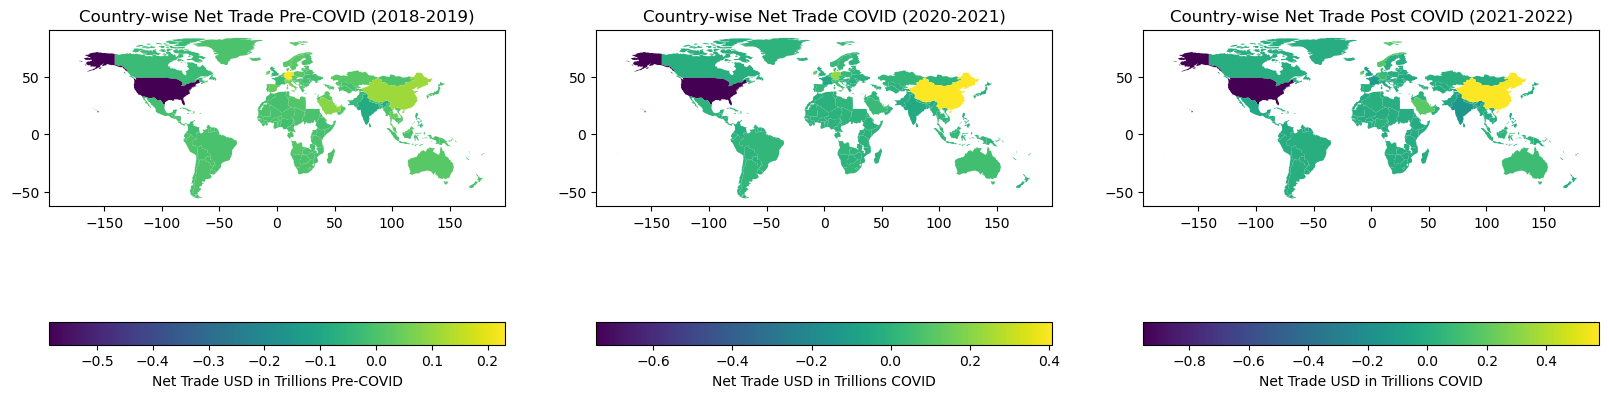

In [53]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import imageio

global_trade_wb_data = global_trade_wb_data.replace('United States', 'United States of America', regex=True)
global_trade_wb_data['Net_Trade_in_Trillions'] = global_trade_wb_data['Net Trade'] / 1e12
# Prepare the data
df_pre_covid = global_trade_wb_data[global_trade_wb_data['Year'].isin([2018, 2019])]
df_covid = global_trade_wb_data[global_trade_wb_data['Year'].isin([2020, 2021])]
df_post_covid = global_trade_wb_data[global_trade_wb_data['Year'].isin([2022, 2023])]

# Aggregate export data by country and calculate the average for each period
exports_pre_covid = df_pre_covid.groupby('Country Name')['Net_Trade_in_Trillions'].mean().reset_index()
exports_covid = df_covid.groupby('Country Name')['Net_Trade_in_Trillions'].mean().reset_index()
exports_post_covid = df_post_covid.groupby('Country Name')['Net_Trade_in_Trillions'].mean().reset_index()

# Load a world map (this requires a shapefile or GeoJSON file)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the world GeoDataFrame with the exports data
world_pre_covid = world.merge(exports_pre_covid, how="left", left_on="name", right_on="Country Name")
world_covid = world.merge(exports_covid, how="left", left_on="name", right_on="Country Name")
world_post_covid = world.merge(exports_post_covid, how="left", left_on="name", right_on="Country Name")

# Plotting
fig, ax = plt.subplots(1, 3, figsize=(20, 10))

world_pre_covid.plot(column='Net_Trade_in_Trillions', ax=ax[0], legend=True,
                     legend_kwds={'label': "Net Trade USD in Trillions Pre-COVID", 'orientation': "horizontal"})
ax[0].set_title('Country-wise Net Trade Pre-COVID (2018-2019)')

world_covid.plot(column='Net_Trade_in_Trillions', ax=ax[1], legend=True,
                 legend_kwds={'label': "Net Trade USD in Trillions COVID", 'orientation': "horizontal"})
ax[1].set_title('Country-wise Net Trade COVID (2020-2021)')

world_post_covid.plot(column='Net_Trade_in_Trillions', ax=ax[2], legend=True,
                 legend_kwds={'label': "Net Trade USD in Trillions COVID", 'orientation': "horizontal"})
ax[2].set_title('Country-wise Net Trade Post COVID (2021-2022)')


plt.show()


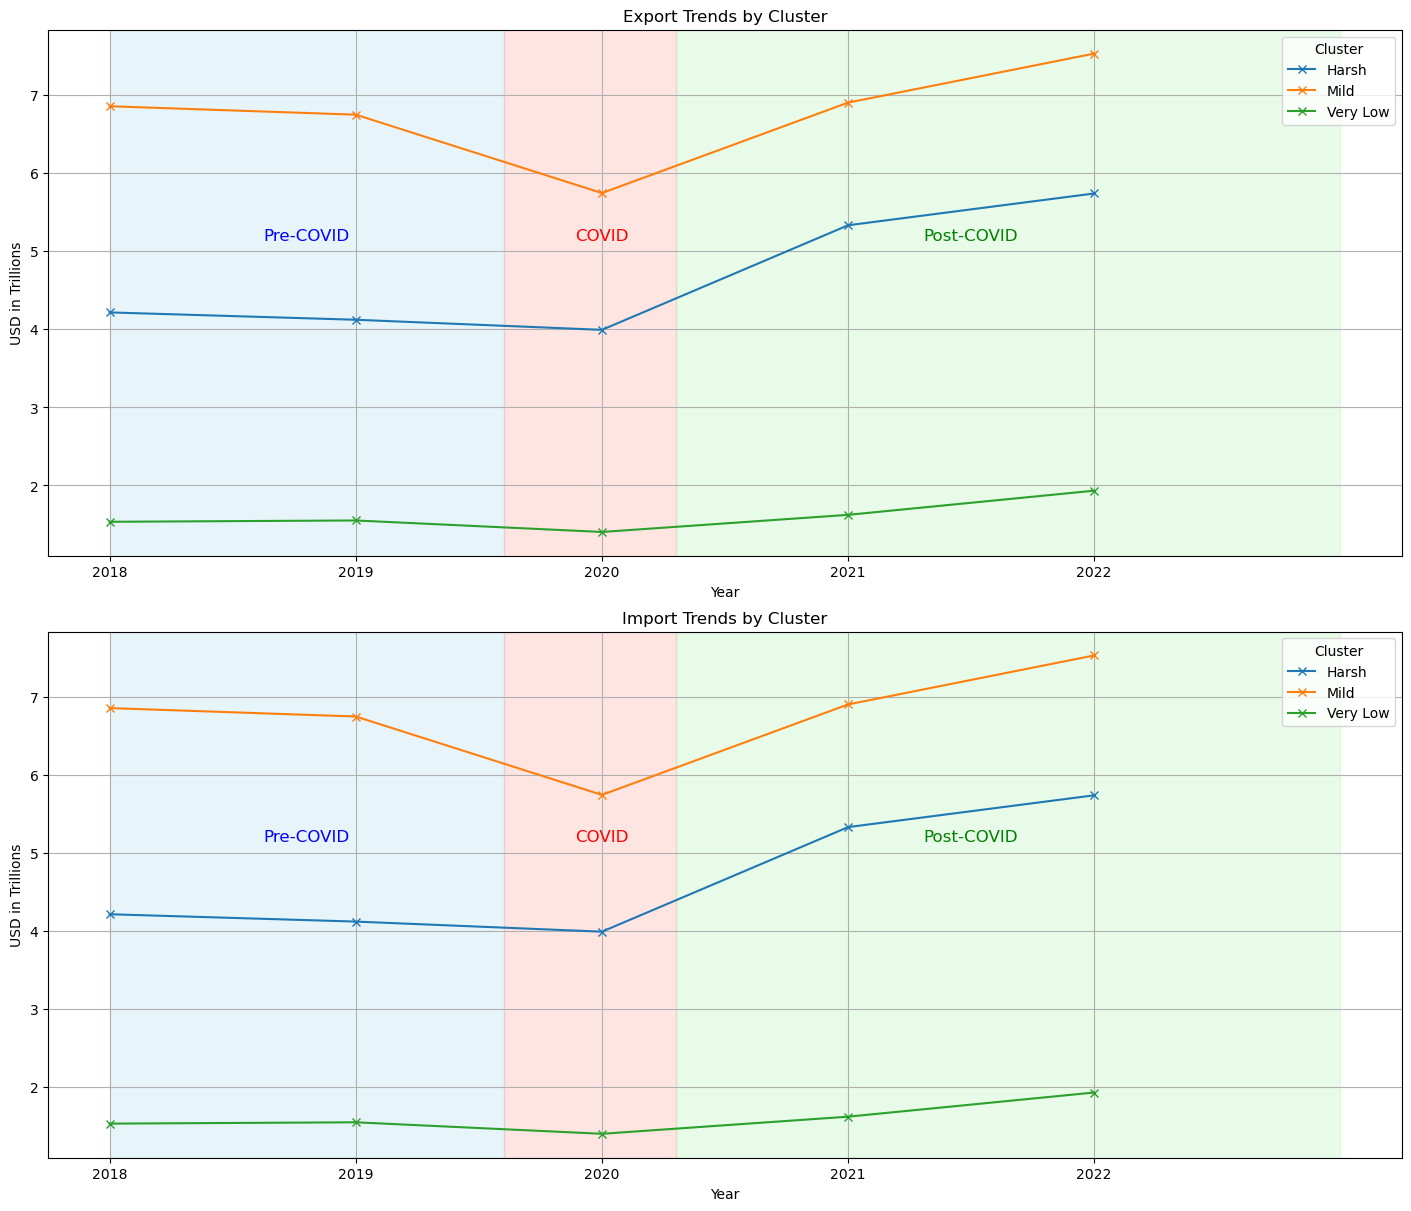

In [28]:
import pandas as pd
import matplotlib.pyplot as plt


# Define the clusters with updated country names
clusters = {
    "Harsh": ["China", "India", "Russian Federation", "Iran"],
    "Mild": ["United States", "United Kingdom", "France", "Italy", "Canada", "Japan", "Saudi Arabia", "Kuwait"],
    "Very Low": ["Qatar", "United Arab Emirates", "Australia", "Singapore", "New Zealand"]
}

# Initialize a DataFrame to store aggregated data for each cluster
cluster_aggregated_data = pd.DataFrame()

# Aggregate data for each cluster from 2018 onwards
for cluster_name, countries in clusters.items():
    cluster_data = global_trade_wb_data[(global_trade_wb_data['Country Name'].isin(countries)) & (global_trade_wb_data['Year'] >= 2018)]
    aggregated = cluster_data.groupby(['Year']).agg({'Export_in_Trillions': 'sum', 'Import_in_Trillions': 'sum'}).reset_index()
    aggregated['Cluster'] = cluster_name  # Add a column to identify the cluster
    cluster_aggregated_data = pd.concat([cluster_aggregated_data, aggregated], ignore_index=True)

# Pivot the aggregated data for easier plotting
cluster_pivot_export = cluster_aggregated_data.pivot(index='Year', columns='Cluster', values='Export_in_Trillions')
cluster_pivot_import = cluster_aggregated_data.pivot(index='Year', columns='Cluster', values='Export_in_Trillions')

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(14, 12), constrained_layout=True)



# Export trends for all clusters from 2018 onwards
cluster_pivot_export.plot(ax=ax[0], marker='x', linestyle='-')
ax[0].set_title('Export Trends by Cluster')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('USD in Trillions')
ax[0].grid(True)
ax[0].legend(title='Cluster')

# Import trends for all clusters from 2018 onwards
cluster_pivot_import.plot(ax=ax[1], marker='x', linestyle='-')
ax[1].set_title('Import Trends by Cluster')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('USD in Trillions')
ax[1].grid(True)
ax[1].legend(title='Cluster')

# Highlighting different periods with background colors
# Calculate max_value

ax[0].axvspan(2018, 2019.6, color='skyblue', alpha=0.2, label='Pre-COVID')
ax[0].axvspan(2019.6, 2020.3, color='salmon', alpha=0.2, label='COVID')
ax[0].axvspan(2020.3, trade_summary['Year'].max() + 0.999, color='lightgreen', alpha=0.2, label='Post-COVID')        

ax[0].text(2018.8, 5.2, 'Pre-COVID', ha='center', va='center', fontsize=12, color='blue')
ax[0].text(2020, 5.2, 'COVID', ha='center', va='center', fontsize=12, color='red')
ax[0].text(2021.5, 5.2, 'Post-COVID', ha='center', va='center', fontsize=12, color='green')
# ax[0].xticks(trade_summary["Year"].values)
ax[1].axvspan(2018, 2019.6, color='skyblue', alpha=0.2, label='Pre-COVID')
ax[1].axvspan(2019.6, 2020.3, color='salmon', alpha=0.2, label='COVID')
ax[1].axvspan(2020.3, trade_summary['Year'].max() + 0.999, color='lightgreen', alpha=0.2, label='Post-COVID')        

ax[1].text(2018.8, 5.2, 'Pre-COVID', ha='center', va='center', fontsize=12, color='blue')
ax[1].text(2020, 5.2, 'COVID', ha='center', va='center', fontsize=12, color='red')
ax[1].text(2021.5, 5.2, 'Post-COVID', ha='center', va='center', fontsize=12, color='green')

ax[0].set_xticks([2018,2019,2020,2021,2022])
ax[1].set_xticks([2018,2019,2020,2021,2022])

plt.show()


### Impact of Agriculture Trade, Crude Oil, Tourism 

In [ ]:
agri_food_categories = [
    '01_live_animals', '02_meat_and_edible_meat_offal',
    '03_fish_crustaceans_molluscs_aquatic_invertebrates_ne',
    '04_dairy_products_eggs_honey_edible_animal_product_nes',
    '05_products_of_animal_origin_nes',
    '06_live_trees_plants_bulbs_roots_cut_flowers_etc',
    '07_edible_vegetables_and_certain_roots_and_tubers',
    '08_edible_fruit_nuts_peel_of_citrus_fruit_melons',
    '09_coffee_tea_mate_and_spices', '10_cereals',
    '11_milling_products_malt_starches_inulin_wheat_glute',
    '12_oil_seed_oleagic_fruits_grain_seed_fruit_etc_ne',
    '15_animal_vegetable_fats_and_oils_cleavage_products_et',
    '16_meat_fish_and_seafood_food_preparations_nes',
    '17_sugars_and_sugar_confectionery',
    '18_cocoa_and_cocoa_preparations',
    '19_cereal_flour_starch_milk_preparations_and_products',
    '20_vegetable_fruit_nut_etc_food_preparations',
    '21_miscellaneous_edible_preparations',
    '22_beverages_spirits_and_vinegar',
    '23_residues_wastes_of_food_industry_animal_fodder'
]


file_path = './data/commodity_trade_statistics_data.csv'  
data = pd.read_csv(file_path)

agri_food_data = data[data['category'].isin(agri_food_categories)]

agri_commodity_codes = agri_food_data['comm_code'].unique()

## Loading all the datasets
df1 = pd.read_csv('./data/BACI_HS17_V202401/BACI_HS17_Y2018_V202401.csv')
df2 = pd.read_csv('./data/BACI_HS17_V202401/BACI_HS17_Y2019_V202401.csv')
df3 = pd.read_csv('./data/BACI_HS17_V202401/BACI_HS17_Y2020_V202401.csv')
df4 = pd.read_csv('./data/BACI_HS17_V202401/BACI_HS17_Y2021_V202401.csv')

dfList = [df1, df2, df3, df4]
new_df = pd.concat(dfList)

agri_food_data = new_df[new_df['k'].isin(agri_commodity_codes)]


before_covid_proxy = [2019]
during_covid_proxy = [2020]
after_covid_proxy = [2021]


before_covid_summary = agri_food_data[agri_food_data['t'].isin(before_covid_proxy)]['v'].sum(numeric_only=True)
during_covid_summary = agri_food_data[agri_food_data['t'].isin(during_covid_proxy)]['v'].sum(numeric_only=True)
after_covid_summary = agri_food_data[agri_food_data['t'].isin(after_covid_proxy)]['v'].sum(numeric_only=True)



years = ['Before COVID-19', 'During COVID-19', 'After COVID-19']
trade_values = [before_covid_summary, during_covid_summary, after_covid_summary]

# Plotting the graphs
plt.figure(figsize=(10, 6))
plt.bar(years, trade_values, color=['skyblue', 'orange', 'lightgreen'])

plt.ylim(bottom=before_covid_summary/2)
plt.title('Global Trade Values of Agriculture & Food Supplies')
plt.xlabel('Period')
plt.ylabel('Trade Value in USD')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()










countries = pd.read_csv('./data/BACI_HS17_V202401/country_codes_V202401.csv')

eu_country_codes = [
    "AT", # Austria
    "BE", # Belgium
    "BG", # Bulgaria
    "HR", # Croatia
    "CY", # Cyprus
    "CZ", # Czech Republic
    "DK", # Denmark
    "EE", # Estonia
    "FI", # Finland
    "FR", # France
    "DE", # Germany
    "GR", # Greece
    "HU", # Hungary
    "IE", # Ireland
    "IT", # Italy
    "LV", # Latvia
    "LT", # Lithuania
    "LU", # Luxembourg
    "MT", # Malta
    "NL", # Netherlands
    "PL", # Poland
    "PT", # Portugal
    "RO", # Romania
    "SK", # Slovakia
    "SI", # Slovenia
    "ES", # Spain
    "SE", # Sweden
    "UA",
    "RU"
]

# eu_country_codes = ['RU']
eu_iso_to_country_code = {}
for iso2_code in eu_country_codes:
    country_code = countries[countries['country_iso2'] == iso2_code]['country_code'].iloc[0]
    eu_iso_to_country_code[iso2_code] = country_code
    

eu_agri = agri_food_data[agri_food_data['i'].isin(eu_iso_to_country_code.values())]



before_covid_summary = eu_agri[eu_agri['t'].isin(before_covid_proxy)]['v'].sum(numeric_only=True)
during_covid_summary = eu_agri[eu_agri['t'].isin(during_covid_proxy)]['v'].sum(numeric_only=True)
after_covid_summary = eu_agri[eu_agri['t'].isin(after_covid_proxy)]['v'].sum(numeric_only=True)



years = ['Before COVID-19', 'During COVID-19', 'After COVID-19']
trade_values = [before_covid_summary, during_covid_summary, after_covid_summary]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(years, trade_values, color=['skyblue', 'orange', 'lightgreen'])
plt.ylim(bottom=before_covid_summary/2)
plt.title('Value of Agriculture & Food Supplies related exports from europe')
plt.xlabel('Period')
plt.ylabel('Trade Value in USD')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()







import numpy as np
import matplotlib.cm as cm



crude_data = pd.read_csv('./data/Global Crude Petroleum Trade 1995-2021.csv')


opec_countries = [
    "Algeria", "Angola", "Equatorial Guinea", "Gabon", "Iran", "Iraq", "Kuwait", "Libya", 
    "Nigeria", "Republic of the Congo", "Saudi Arabia", "United Arab Emirates", "Venezuela", "Russia"
]

# Filtering the dataset for OPEC countries plus Russia
opec_data = crude_data[crude_data['Country'].isin(opec_countries)]

# Separating the data into exports
opec_exports = opec_data[opec_data['Action'] == 'Export']

# Aggregating trade values by country and year for exports
exports_by_country_year = opec_exports.groupby(['Country', 'Year'])['Trade Value'].sum().unstack()

# Filtering the export data from 2016 to the latest available year
exports_2016_onwards = exports_by_country_year.loc[:, 2016:]

# Generating colors for each country
colors = cm.rainbow(np.linspace(0, 1, len(exports_2016_onwards.index)))

# Plotting the export trends for all OPEC countries plus Russia from 2016 onwards on a single graph
plt.figure(figsize=(14, 8))

for country, color in zip(exports_2016_onwards.index, colors):
    plt.plot(exports_2016_onwards.columns, exports_2016_onwards.loc[country], label=country, marker='o', color=color)

plt.title('Crude Oil Export Trends for OPEC+Russia (2016-Latest)')
plt.xlabel('Year')
plt.ylabel('Trade Value in USD')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()









tourism_data_df = pd.read_excel('./data/indicator_8.9.1_august2023_update.xlsx')
countries_df = pd.read_csv('./data/Countries.csv')

# Filtering the tourism data for the years 2017, 2018, 2019, 2020, and 2021
tourism_filtered_with_2021 = tourism_data_df[tourism_data_df['TimePeriod'].isin([2017, 2018, 2019, 2020, 2021])]

# Filtering the countries GDP data for the years 2017, 2018, 2019, 2020, and 2021
countries_gdp_filtered_with_2021 = countries_df[countries_df['Year'].isin([2017, 2018, 2019, 2020, 2021])]

# Ensuring complete data countries include 2021 data
complete_data_countries_with_2021 = tourism_filtered_with_2021.groupby('GeoAreaName').filter(lambda x: len(x) == 5)

# Merging the updated tourism data with the updated countries GDP data
merged_data_with_2021 = pd.merge(complete_data_countries_with_2021, countries_gdp_filtered_with_2021, left_on=['GeoAreaName', 'TimePeriod'], right_on=['Country Name', 'Year'])

# Calculating the actual tourism value for 2021 as well
merged_data_with_2021['Tourism Value'] = merged_data_with_2021['Total'] * merged_data_with_2021['GDP'] / 100

# Identifying the top 10-15 countries based on their average tourism value including 2021
top_countries_by_tourism_value_with_2021 = merged_data_with_2021.groupby('GeoAreaName')['Tourism Value'].mean().nlargest(15)

# Filtering the merged data to include only the top countries with 2021 data
top_countries_data_with_2021 = merged_data_with_2021[merged_data_with_2021['GeoAreaName'].isin(top_countries_by_tourism_value_with_2021.index)]

# Doing Pivot the data for easier plotting including 2021
pivot_top_countries_data_with_2021 = top_countries_data_with_2021.pivot(index='GeoAreaName', columns='TimePeriod', values='Tourism Value')

# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Plotting the trends for the top countries including 2021
plt.figure(figsize=(20, 10))
sns.lineplot(data=pivot_top_countries_data_with_2021.T, dashes=False)
plt.title('Tourism Value Trends 2017-2021 in Top Contributing Countries', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Tourism Value (USD)', fontsize=14)
plt.xticks([2017, 2018, 2019, 2020, 2021])
plt.legend(title='Country', title_fontsize='15', fontsize='13', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

### Medical import/export dataset

In [5]:
# Importing the necessary datasets for medical trade
import pandas as pd
data2 = pd.read_csv("Data2.csv")
data2.head()

,Country or Area,Year,Commodity,Flow,Trade (USD),Weight (kg),Quantity Name,Quantity
0,Afghanistan,2019,Vaccines; for human medicine,Import,21580539.39,105925.38,Weight in kilograms,105925.38
1,Afghanistan,2019,Vaccines; for veterinary medicine,Import,272829.88,14675.38,Weight in kilograms,14675.38
2,Afghanistan,2019,"Dressings, adhesive; and other articles having...",Import,2988741.57,451724.10,Weight in kilograms,451724.10
3,Afghanistan,2019,Pharmaceutical goods; Gel preparations designe...,Export,19206.30,12355.60,Weight in kilograms,12355.60
4,Afghanistan,2019,Pharmaceutical goods; Gel preparations designe...,Re-Export,10267.41,7855.60,Weight in kilograms,7855.60


In [6]:
data2["Commodity"].unique()

array(['Vaccines; for human medicine',
       'Vaccines; for veterinary medicine',
       'Dressings, adhesive; and other articles having an adhesive layer, packed for retail sale for medical, surgical, dental or veterinary purposes',
       'Pharmaceutical goods; Gel preparations designed to be used in human or veterinary medicine as a lubricant for parts of the body for surgical operations or physical examinations or as a coupling agent between the body and medical instruments',
       'Blood, human or animal, antisera, other blood fractions and immunological products; antisera and other blood fractions',
       'Blood, human or animal, antisera, other blood fractions and immunological products; immunological products, put up in measured doses or in forms or packings for retail sale',
       'Toxins, cultures of micro-organisms (excluding yeasts) and similar products',
       'Medicaments; containing hormones (but not insulin), adrenal cortex hormones or antibiotics, for therapeutic 

In [7]:
## Pre-covid
df_precovid = data2[data2['Year'].isin([2017, 2018, 2019])]

In [8]:
df_precovid["Flow"].unique() # Re-export means goods that are imported into country and without any alterations they are exported.
df_precovid = df_precovid[df_precovid["Quantity Name"] != 'No Quantity'] # Quantity not mentioned in some years dropping that for clear indication
df_precovid.head()

,Country or Area,Year,Commodity,Flow,Trade (USD),Weight (kg),Quantity Name,Quantity
0,Afghanistan,2019,Vaccines; for human medicine,Import,21580539.39,105925.38,Weight in kilograms,105925.38
1,Afghanistan,2019,Vaccines; for veterinary medicine,Import,272829.88,14675.38,Weight in kilograms,14675.38
2,Afghanistan,2019,"Dressings, adhesive; and other articles having...",Import,2988741.57,451724.10,Weight in kilograms,451724.10
3,Afghanistan,2019,Pharmaceutical goods; Gel preparations designe...,Export,19206.30,12355.60,Weight in kilograms,12355.60
4,Afghanistan,2019,Pharmaceutical goods; Gel preparations designe...,Re-Export,10267.41,7855.60,Weight in kilograms,7855.60


In [9]:
grouped_data = df_precovid.groupby(['Year', 'Country or Area', 'Flow']).agg({
    'Trade (USD)': 'sum',
    'Quantity': 'sum'
    
}).reset_index()
grouped_data

,Year,Country or Area,Flow,Trade (USD),Quantity
0,2017,ASEAN,Export,6.085568e+09,9.692156e+07
1,2017,ASEAN,Import,1.105380e+10,3.348704e+08
2,2017,Afghanistan,Import,9.675265e+07,3.421646e+06
3,2017,Albania,Export,1.780676e+06,8.135110e+04
4,2017,Albania,Import,1.159825e+08,3.047276e+06
...,...,...,...,...,...
1114,2019,Yemen,Import,1.277165e+08,2.199742e+07
1115,2019,Zambia,Export,3.607880e+06,4.925492e+05
1116,2019,Zambia,Import,2.046332e+08,3.147231e+07
1117,2019,Zimbabwe,Export,2.964935e+06,3.027725e+05


In [10]:
grouped_data['Period'] = 'pre_covid'
grouped_data.loc[grouped_data['Year'] > 2019, 'Period'] = 'covid'

final_precovid = grouped_data.groupby(['Period', 'Country or Area', 'Flow']).agg({
    'Trade (USD)': 'sum',
    'Quantity': 'sum'
}).reset_index()

In [11]:
final_precovid

,Period,Country or Area,Flow,Trade (USD),Quantity
0,pre_covid,ASEAN,Export,1.418140e+10,3.136397e+08
1,pre_covid,ASEAN,Import,2.560574e+10,7.715932e+08
2,pre_covid,Afghanistan,Export,1.920630e+04,1.235560e+04
3,pre_covid,Afghanistan,Import,3.483024e+08,6.994490e+07
4,pre_covid,Afghanistan,Re-Export,1.026741e+04,7.855600e+03
...,...,...,...,...,...
397,pre_covid,Zambia,Export,4.246374e+06,5.999584e+05
398,pre_covid,Zambia,Import,6.274913e+08,5.038328e+07
399,pre_covid,Zambia,Re-Export,6.993833e+03,4.600000e+01
400,pre_covid,Zimbabwe,Export,8.215919e+06,9.469550e+05


In [12]:
threshold_percentage = 10
exports_data = final_precovid[final_precovid['Flow'] == 'Export']
total_exports = exports_data.groupby('Country or Area')['Trade (USD)'].sum().reset_index()
threshold_value = total_exports['Trade (USD)'].quantile(1 - threshold_percentage / 100)
top_exporters = total_exports[total_exports['Trade (USD)'] > threshold_value]
print(top_exporters) ## This gives list of top 10% countries for export of HS-30

    Country or Area   Trade (USD)
11          Austria  3.013729e+10
17          Belgium  9.190826e+10
35            China  2.540277e+10
46          Denmark  1.856005e+10
48            EU-28  5.504988e+11
56           France  1.007531e+11
60          Germany  2.690512e+11
70            India  4.342955e+10
73          Ireland  1.441482e+11
75            Italy  8.402230e+10
107     Netherlands  7.063462e+10
137       Singapore  2.235447e+10
142           Spain  3.569224e+10
148          Sweden  2.666721e+10
149     Switzerland  2.281017e+11
158             USA  1.297232e+11
162  United Kingdom  8.957828e+10


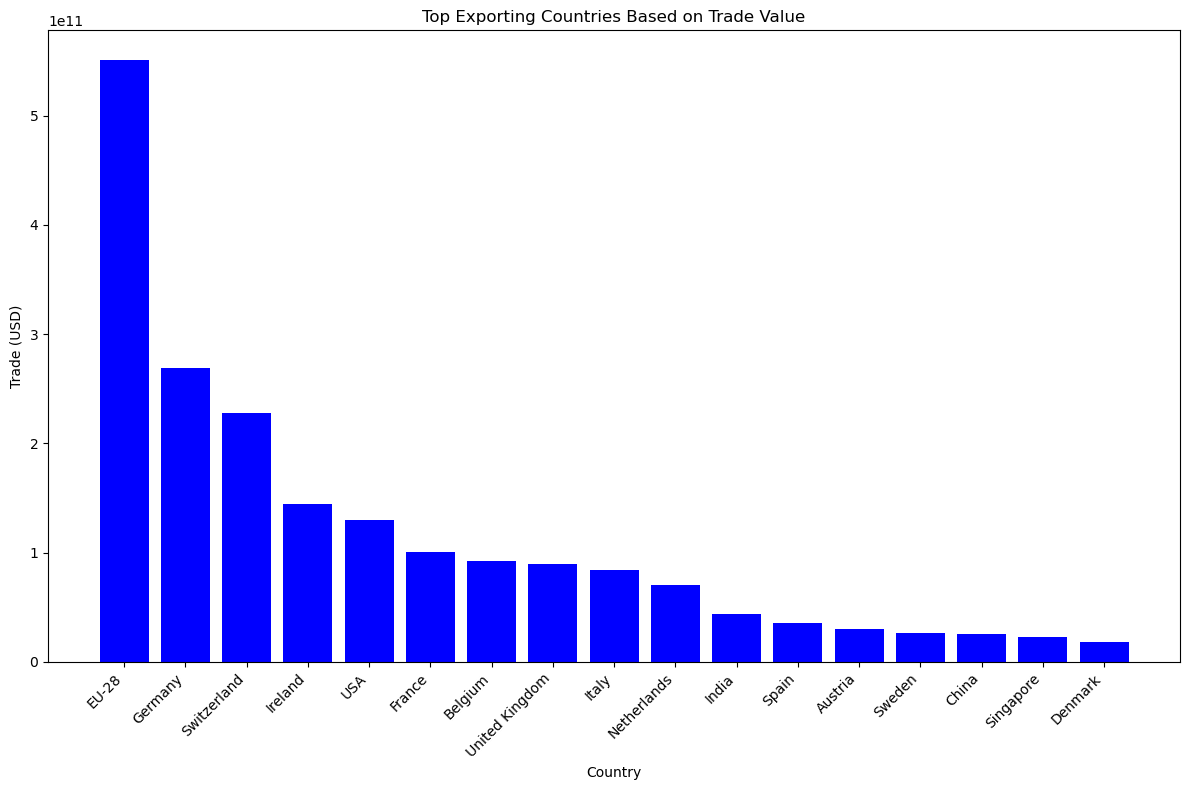

In [13]:
import matplotlib.pyplot as plt
top_exporters_sorted = top_exporters.sort_values(by='Trade (USD)', ascending=False)
plt.figure(figsize=(12, 8))
plt.bar(top_exporters_sorted['Country or Area'], top_exporters_sorted['Trade (USD)'], color='blue')
plt.xlabel('Country')
plt.ylabel('Trade (USD)')
plt.title('Top Exporting Countries Based on Trade Value')
plt.xticks(rotation=45, ha='right')  # Rotate country names for better readability
plt.tight_layout()
plt.show()


In [24]:
max_trade_country = final_precovid.loc[final_precovid["Trade (USD)"].idxmax(), "Country or Area"]
max_trade_value = final_precovid["Trade (USD)"].max()
max_trade_type = final_precovid["Flow"]
print("Country or Area with maximum Trade (USD):", max_trade_country)
print("Maximum Trade (USD):", max_trade_value)
print("Flow type for maximum Trade (USD) :", max_trade_type[final_covid["Trade (USD)"].idxmax()])


Country or Area with maximum Trade (USD): EU-28
Maximum Trade (USD): 550498754301.432
Flow type for maximum Trade (USD) : Import


In [23]:
min_trade_country = final_precovid.loc[final_precovid["Trade (USD)"].idxmin(), "Country or Area"]
min_trade_value = final_precovid["Trade (USD)"].min()
min_trade_type = final_precovid["Flow"]
print("Country or Area with minimum Trade (USD):", min_trade_country)
print("Minimum Trade (USD):", min_trade_value)
print("Flow type for minimum Trade (USD) :", min_trade_type[final_covid["Trade (USD)"].idxmin()])

Country or Area with minimum Trade (USD): Sudan
Minimum Trade (USD): 1.0
Flow type for minimum Trade (USD) : Export


In [16]:
## During covid Data
df_covid = data2[data2['Year'].isin([2020, 2021, 2022])]
df_covid = df_covid[df_covid["Quantity Name"] != 'No Quantity']
df_covid

,Country or Area,Year,Commodity,Flow,Trade (USD),Weight (kg),Quantity Name,Quantity
10,Albania,2022,"Blood, human or animal, antisera, other blood ...",Import,1.413882e+05,244.29,Weight in kilograms,244.29
11,Albania,2022,"Blood, human or animal, antisera, other blood ...",Import,9.759023e+05,696.66,Weight in kilograms,696.66
12,Albania,2022,"Toxins, cultures of micro-organisms (excluding...",Import,9.131206e+03,7.90,Weight in kilograms,7.90
13,Albania,2022,Medicaments; containing hormones (but not insu...,Import,1.241481e+06,1922.62,Weight in kilograms,1922.62
14,Albania,2022,Medicaments; consisting of mixed or unmixed pr...,Export,1.633055e+05,1652.53,Weight in kilograms,1652.53
...,...,...,...,...,...,...,...,...
53798,Zimbabwe,2020,Pharmaceutical goods; first aid boxes and kits,Import,4.871968e+04,11501.61,Weight in kilograms,11501.61
53799,Zimbabwe,2020,Pharmaceutical goods; chemical contraceptive p...,Import,1.225721e+07,393009.97,Weight in kilograms,393009.97
53800,Zimbabwe,2020,Pharmaceutical goods; Gel preparations designe...,Import,2.743730e+04,7067.52,Weight in kilograms,7067.52
53801,Zimbabwe,2020,Pharmaceutical goods; appliances identifiable ...,Import,1.796971e+04,1189.60,Weight in kilograms,1189.60


In [17]:
grouped_covid_data = df_covid.groupby(['Year', 'Country or Area', 'Flow']).agg({
    'Trade (USD)': 'sum',
    'Quantity': 'sum'
    
}).reset_index()
grouped_covid_data

,Year,Country or Area,Flow,Trade (USD),Quantity
0,2020,ASEAN,Export,2.713964e+09,1.041127e+08
1,2020,ASEAN,Import,1.409586e+10,4.323616e+08
2,2020,Albania,Export,2.355555e+06,9.003845e+04
3,2020,Albania,Import,1.967433e+08,5.493098e+06
4,2020,Andorra,Export,3.915438e+04,1.848142e+04
...,...,...,...,...,...
943,2022,Uzbekistan,Export,2.495761e+07,1.137637e+07
944,2022,Uzbekistan,Import,1.584956e+09,3.616773e+07
945,2022,Uzbekistan,Re-Export,1.051240e+05,2.270000e+03
946,2022,Zimbabwe,Export,3.330604e+06,2.510069e+05


In [22]:
## Can be ignored
threshold_percentage = 10
exports_data_covid = final_covid[final_covid['Flow'] == 'Export']
total_exports_covid = exports_data_covid.groupby('Country or Area')['Trade (USD)'].sum().reset_index()
threshold_value_covid = total_exports_covid['Trade (USD)'].quantile(1 - threshold_percentage / 100)
top_exporters_covid = total_exports_covid[total_exports_covid['Trade (USD)'] > threshold_value_covid]
print(top_exporters_covid)


    Country or Area   Trade (USD)
8           Austria  4.007851e+10
14          Belgium  1.861427e+11
31            China  6.576475e+10
45            EU-28  7.555243e+11
53           France  1.142141e+11
57          Germany  2.871394e+11
65            India  5.763624e+10
67          Ireland  2.014142e+11
69            Italy  1.203035e+11
100     Netherlands  8.517011e+10
130        Slovenia  3.289876e+10
132           Spain  5.252051e+10
137          Sweden  3.619009e+10
138     Switzerland  2.879431e+11
146             USA  2.144112e+11
150  United Kingdom  7.756106e+10


In [19]:
grouped_covid_data['Period'] = 'covid'
grouped_covid_data.loc[grouped_covid_data['Year'] > 2022, 'Period'] = 'NA'

final_covid = grouped_covid_data.groupby(['Period', 'Country or Area', 'Flow']).agg({
    'Trade (USD)': 'sum',
    'Quantity': 'sum'
}).reset_index()

In [20]:
final_covid["Country or Area"].nunique() ## Can tell that during covid many countries import/export was either closed or no data found in UN Statistics

159

In [21]:
final_covid

,Period,Country or Area,Flow,Trade (USD),Quantity
0,covid,ASEAN,Export,1.356723e+10,3.988851e+08
1,covid,ASEAN,Import,4.405726e+10,8.776691e+08
2,covid,Albania,Export,3.809394e+06,1.229779e+05
3,covid,Albania,Import,3.757119e+08,9.785635e+06
4,covid,Andorra,Export,2.900902e+05,3.240027e+04
...,...,...,...,...,...
366,covid,Zambia,Import,6.045298e+08,6.006492e+07
367,covid,Zambia,Re-Export,5.795300e+01,1.100000e+01
368,covid,Zimbabwe,Export,8.164929e+06,6.428697e+05
369,covid,Zimbabwe,Import,8.419852e+08,1.779368e+07


In [25]:
# Clearly EU was importing before covid the maximum and during covid they wer exporting the maximum

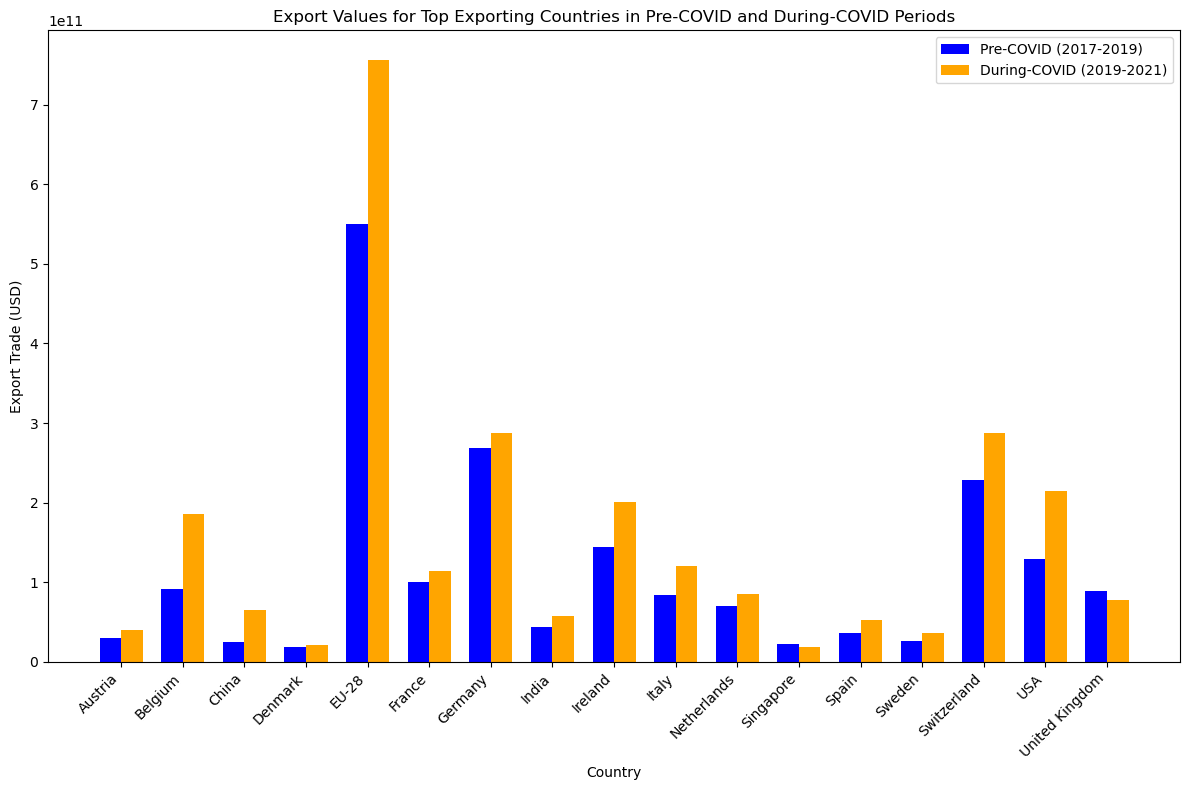

In [26]:
import numpy as np
combined_data = pd.concat([final_precovid, final_covid])
combined_data_export = combined_data[combined_data['Flow'] == 'Export']
top_exporters_combined = combined_data_export[combined_data_export['Country or Area'].isin(top_exporters['Country or Area'])]

# Pivot the data
pivot_data = top_exporters_combined.pivot_table(index='Country or Area', columns='Period', values='Trade (USD)', aggfunc='sum')

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.35
bar_positions = np.arange(len(pivot_data.index))

pre_covid_bars = ax.bar(bar_positions, pivot_data['pre_covid'], width=bar_width, label='Pre-COVID (2017-2019)', color='blue')
post_covid_bars = ax.bar(bar_positions + bar_width, pivot_data['covid'], width=bar_width, label='During-COVID (2019-2021)', color='orange')

ax.set_xlabel('Country')
ax.set_ylabel('Export Trade (USD)')  # Update the y-axis label
ax.set_title('Export Values for Top Exporting Countries in Pre-COVID and During-COVID Periods')
ax.set_xticks(bar_positions + bar_width / 2)
ax.set_xticklabels(pivot_data.index, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

In [28]:
# Clearly apart from United kingdom all the countries were booming in terms of trade values

In [29]:
df_new = combined_data[combined_data["Country or Area"] == "USA"] # Ignore
df_new

,Period,Country or Area,Flow,Trade (USD),Quantity
372,pre_covid,USA,Export,1.297232e+11,7.590014e+08
373,pre_covid,USA,Import,3.407516e+11,1.605929e+09
374,pre_covid,USA,Re-Export,1.240303e+10,5.099424e+07
342,covid,USA,Export,2.144112e+11,8.521193e+08
343,covid,USA,Import,4.539528e+11,2.096084e+09
344,covid,USA,Re-Export,3.518719e+10,8.798167e+07


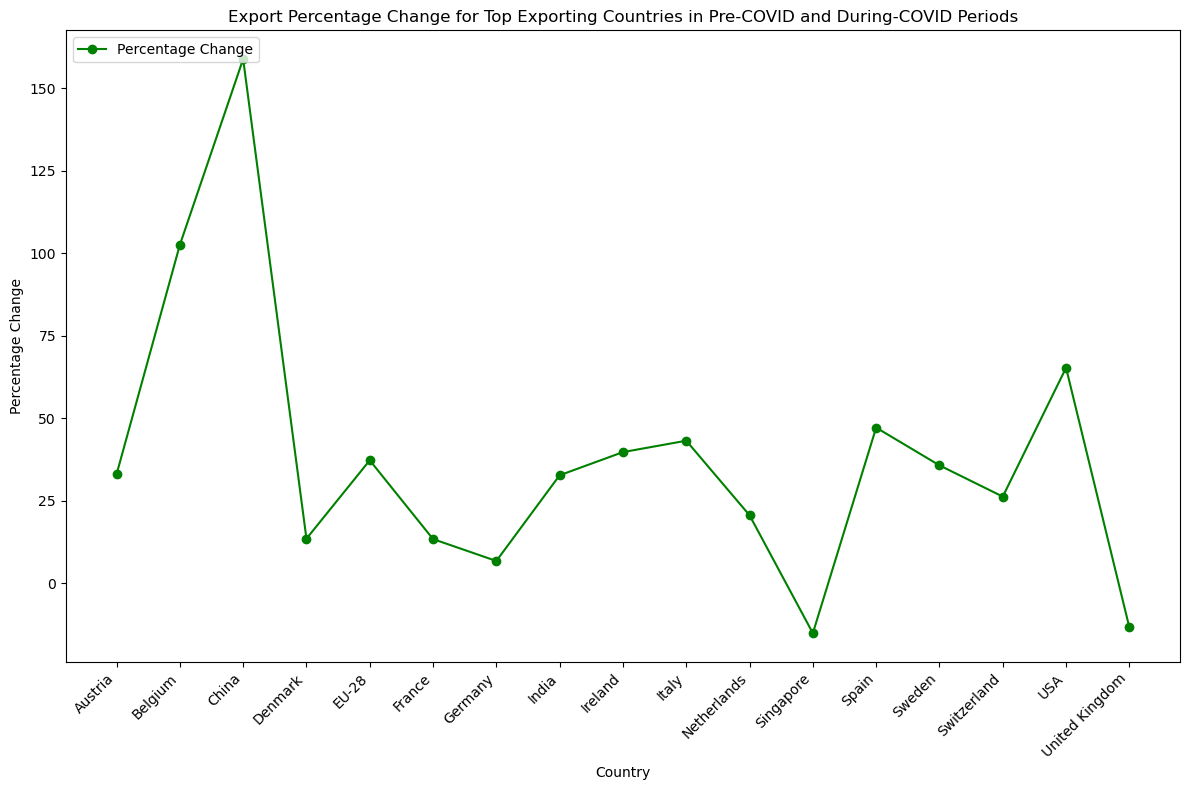

In [30]:
export_data = combined_data[(combined_data['Country or Area'].isin(top_exporters['Country or Area'])) & (combined_data['Flow'] == 'Export')]

# Pivot the DataFrame for easy plotting
pivot_data = export_data.pivot_table(index='Country or Area', columns='Period', values='Trade (USD)', aggfunc='sum')

# Calculate percentage change
percentage_change = ((pivot_data['covid'] - pivot_data['pre_covid']) / pivot_data['pre_covid']) * 100

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.35
bar_positions = np.arange(len(pivot_data.index))

# Line plot for percentage change
line = ax.plot(bar_positions + bar_width / 2, percentage_change, label='Percentage Change', color='green', marker='o')

ax.set_xlabel('Country')
ax.set_ylabel('Percentage Change')
ax.set_title('Export Percentage Change for Top Exporting Countries in Pre-COVID and During-COVID Periods')
ax.set_xticks(bar_positions + bar_width / 2)
ax.set_xticklabels(pivot_data.index, rotation=45, ha='right')
ax.legend(loc='upper left')

plt.tight_layout()
plt.show()


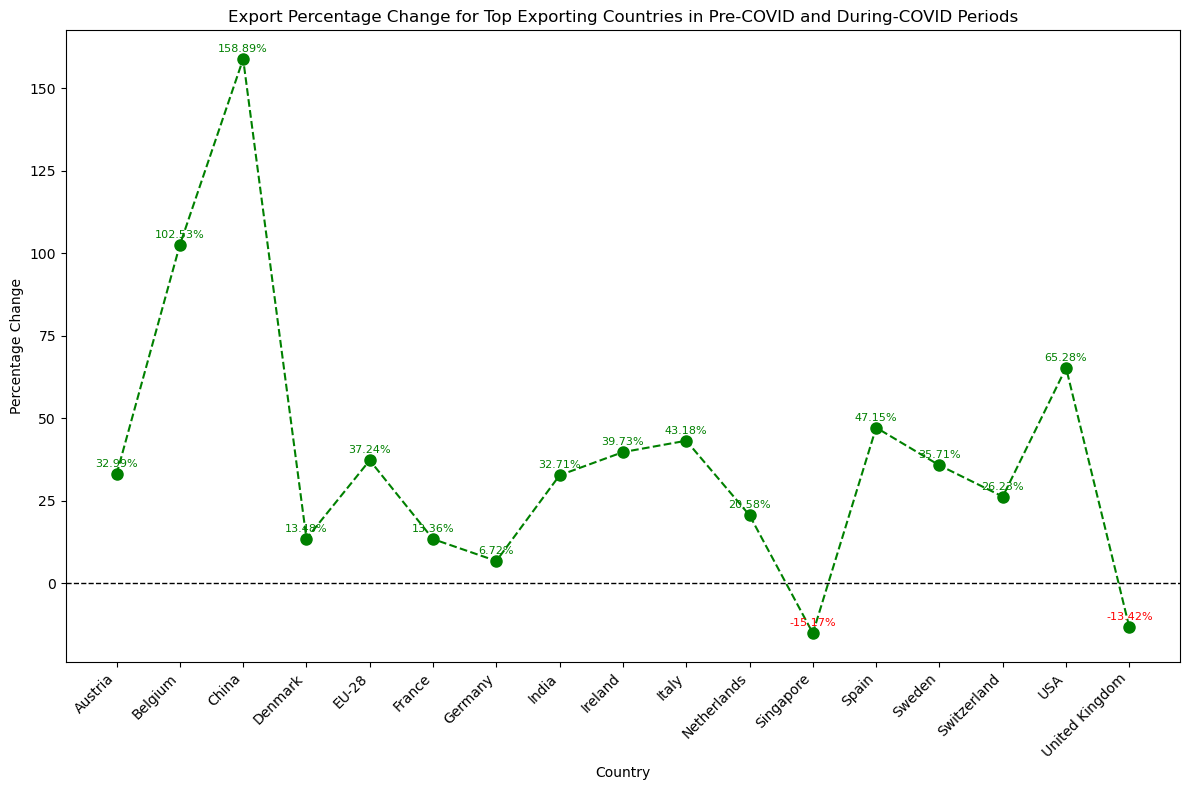

In [31]:
fig, ax = plt.subplots(figsize=(12, 8))

# Line plot for percentage change with a single line connecting all data points
ax.plot(bar_positions + bar_width / 2, percentage_change, marker='o', markersize=8, linestyle='dashed', color='green')

# Adding a dotted line at y=0
ax.axhline(y=0, color='black', linestyle='--', linewidth=1)

# Adding data labels to the line plot
for i, txt in enumerate(percentage_change):
    ax.annotate(f"{txt:.2f}%", (bar_positions[i] + bar_width / 2, percentage_change[i]),
                textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8, color='green' if txt >= 0 else 'red')

ax.set_xlabel('Country')
ax.set_ylabel('Percentage Change')
ax.set_title('Export Percentage Change for Top Exporting Countries in Pre-COVID and During-COVID Periods')
ax.set_xticks(bar_positions + bar_width / 2)
ax.set_xticklabels(pivot_data.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [32]:
# China has got the highest export % change during covid

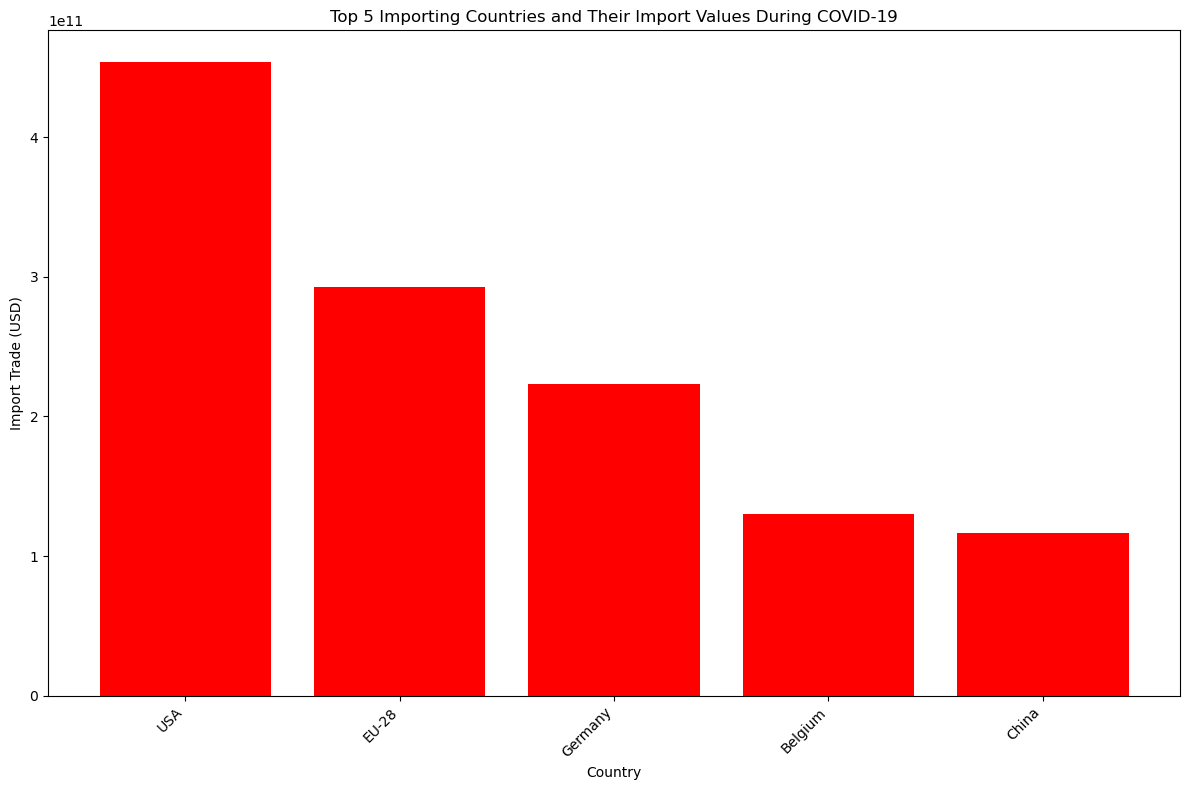

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have 'combined_data' DataFrame (concatenated data)
# Filter data for import flows during COVID
import_data = combined_data[(combined_data['Flow'] == 'Import') & (combined_data['Period'] == 'covid')]

# Pivot the DataFrame for easy plotting
pivot_import_data = import_data.pivot_table(index='Country or Area', values='Trade (USD)', aggfunc='sum')

# Sorting the data by import values in descending order to get top importers
sorted_import_data = pivot_import_data.sort_values(by='Trade (USD)', ascending=False)

# Select the top N importers, adjust N as needed
top_n_importers = 5
top_importers = sorted_import_data.head(top_n_importers)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Bar plot for import values during COVID for the top importers
bar_positions = np.arange(len(top_importers.index))
bars = ax.bar(bar_positions, top_importers['Trade (USD)'], color='red')

ax.set_xlabel('Country')
ax.set_ylabel('Import Trade (USD)')
ax.set_title(f'Top {top_n_importers} Importing Countries and Their Import Values During COVID-19')
ax.set_xticks(bar_positions)
ax.set_xticklabels(top_importers.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()


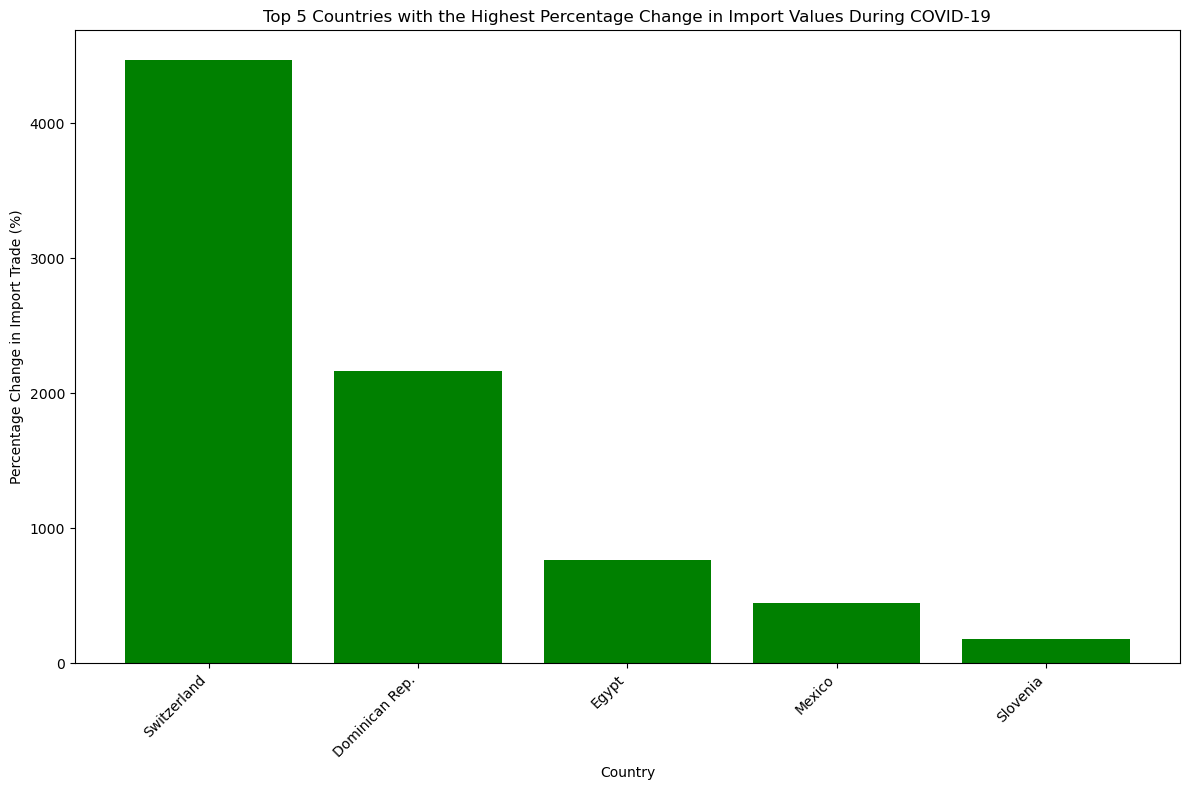

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have 'combined_data' DataFrame (concatenated data)
# Filter data for import flows during COVID and pre-COVID
import_data_covid = combined_data[(combined_data['Flow'] == 'Import') & (combined_data['Period'] == 'covid')]
import_data_precovid = combined_data[(combined_data['Flow'] == 'Import') & (combined_data['Period'] == 'pre_covid')]

# Pivot the DataFrames for easy comparison
pivot_import_covid = import_data_covid.pivot_table(index='Country or Area', values='Trade (USD)', aggfunc='sum')
pivot_import_precovid = import_data_precovid.pivot_table(index='Country or Area', values='Trade (USD)', aggfunc='sum')

# Calculate the percentage change in import values during COVID
percentage_change = ((pivot_import_covid - pivot_import_precovid) / pivot_import_precovid) * 100

# Find the top 5 countries with the highest percentage change
top_5_countries = percentage_change.nlargest(5, 'Trade (USD)')

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
bar_positions = np.arange(len(top_5_countries.index))
bars = ax.bar(bar_positions, top_5_countries['Trade (USD)'], color='green')

ax.set_xlabel('Country')
ax.set_ylabel('Percentage Change in Import Trade (%)')
ax.set_title('Top 5 Countries with the Highest Percentage Change in Import Values During COVID-19')
ax.set_xticks(bar_positions)
ax.set_xticklabels(top_5_countries.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [35]:
# These are the countries with highest import (USD) value % change from precovid to covid


In [45]:
# Importing previously created only USA data
data_usa = pd.read_csv("USA.csv")

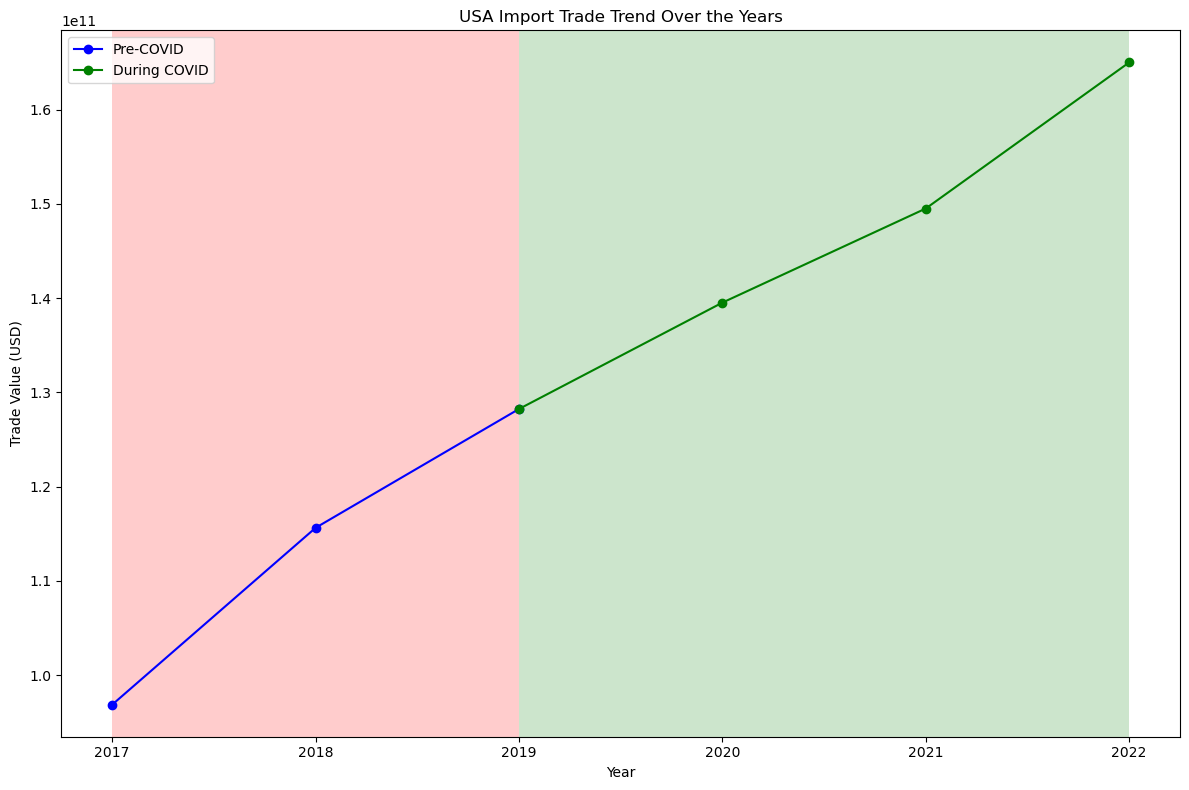

In [46]:
usa_import_data = data_usa

# Separate the data based on the specified time periods
pre_covid_data = usa_import_data[usa_import_data['Year'] <= 2019]
covid_data = usa_import_data[(usa_import_data['Year'] >= 2019) & (usa_import_data['Year'] <= 2022)]

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting pre-COVID data with red background
ax.plot(pre_covid_data['Year'], pre_covid_data['Trade (USD)'], marker='o', label='Pre-COVID', color='blue')
ax.axvspan(min(pre_covid_data['Year']), max(pre_covid_data['Year']), facecolor='red', alpha=0.2)

# Plotting COVID data with green background
ax.plot(covid_data['Year'], covid_data['Trade (USD)'], marker='o', label='During COVID', color='green')
ax.axvspan(min(covid_data['Year']), max(covid_data['Year']), facecolor='green', alpha=0.2)

ax.set_xlabel('Year')
ax.set_ylabel('Trade Value (USD)')
ax.set_title('USA Import Trade Trend Over the Years')
ax.legend()

plt.tight_layout()
plt.show()

## Impact on countries with strong IT trades

In [47]:
#1. Bar Plot of Total Export Values Comparison for the top 10 countries

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the data with appropriate header
data_ajinkya = pd.read_excel('Ajinkya_Dataset.xlsx',header=2)

In [58]:
# Fill missing values with 0
data_ajinkya.fillna(0, inplace=True)

In [59]:
# Extract the years for pre-COVID and during COVID periods
pre_covid_years = [2016, 2017, 2018]
covid_years = [2019, 2020, 2021, 2022]

In [60]:
# Calculate total export values for pre-COVID and during COVID periods
data_ajinkya['Pre-COVID'] = data_ajinkya[pre_covid_years].sum(axis=1)
data_ajinkya['During COVID'] = data_ajinkya[covid_years].sum(axis=1)

In [61]:
# Calculate the increase in export values from pre-COVID to COVID years
data_ajinkya['Export Increase'] = data_ajinkya['During COVID'] - data_ajinkya['Pre-COVID']

In [62]:
# Get the top 10 countries with the highest export increase during COVID
top_10_countries = data_ajinkya.nlargest(10, 'Export Increase')

In [63]:
# Define the positions for each set of bars
bar_width = 0.35
x = np.arange(len(top_10_countries))

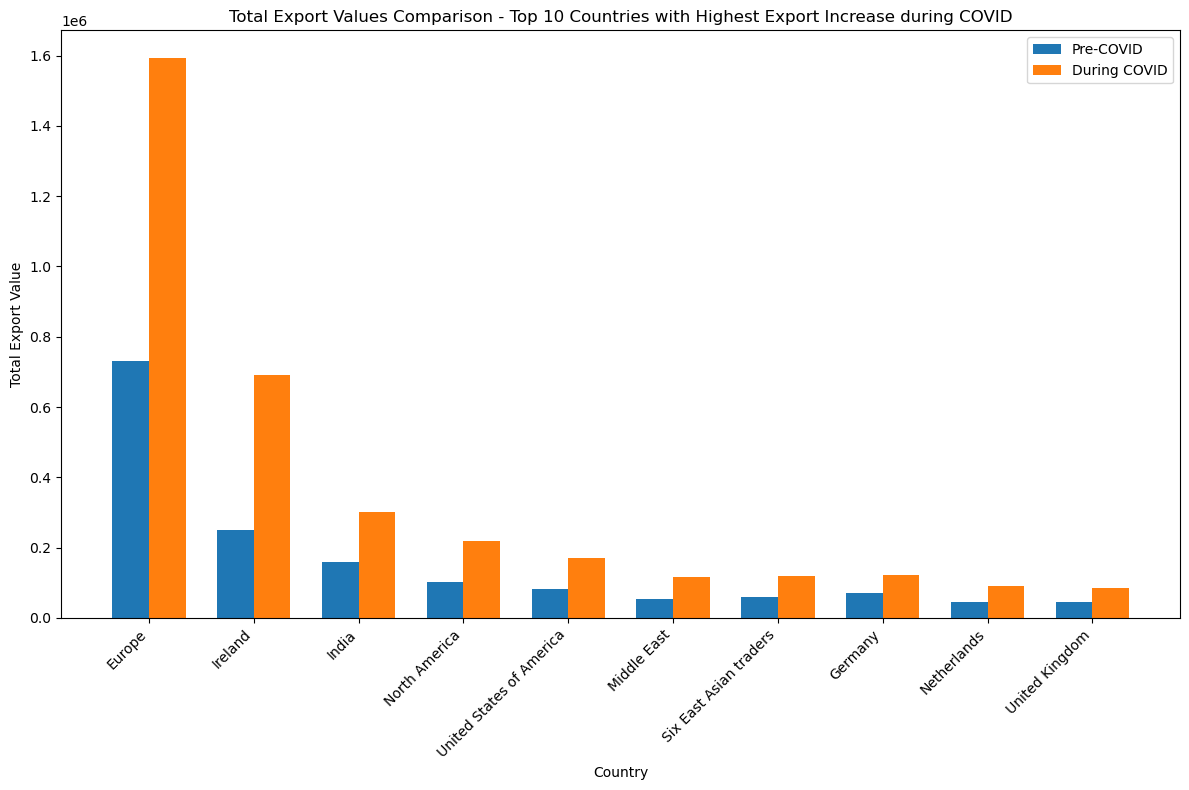

In [64]:
# Plot 1: Bar Plot of Total Export Values Comparison for the top 10 countries
plt.figure(figsize=(12, 8))
plt.bar(x - bar_width/2, top_10_countries['Pre-COVID'], width=bar_width,
label='Pre-COVID')
plt.bar(x + bar_width/2, top_10_countries['During COVID'], width=bar_width,
label='During COVID')
plt.title('Total Export Values Comparison - Top 10 Countries with Highest Export Increase during COVID')
plt.xlabel('Country')
plt.ylabel('Total Export Value')
plt.xticks(ticks=x, labels=top_10_countries['Reporting Economy'],
rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

In [66]:
#2. Overall Trend of Trade Over Years
import numpy as np
# Fit a polynomial regression line
degree = 2 # You can adjust the degree of the polynomial
coefficients = np.polyfit(total_trade_per_year.index.astype(int),
total_trade_per_year.values, degree)
polynomial = np.poly1d(coefficients)
# Create a scatter plot with a gradient colormap
plt.figure(figsize=(10, 6))
sns.scatterplot(x=total_trade_per_year.index,
y=total_trade_per_year.values, hue=total_trade_per_year.values,
palette='viridis', s=100)
plt.title('Overall Trend of Trade Over Years')
plt.xlabel('Year')
plt.ylabel('Total Trade Value')
plt.xticks(rotation=45)
plt.grid(True)
# Plot the polynomial regression line
plt.plot(total_trade_per_year.index,
polynomial(total_trade_per_year.index.astype(int)), color='orange')
plt.show()